# 1er TP de sistemas inteligentes

Nombre:

Este trabajo práctico se aprueba completando más del 70% del mismo. Una vez completado el notebook y reenvielo al email 2329034@ucc.edu.ar. Importante: Asegurese que su correo haya llegado.

### Entender el problema

El hundimiento del Titanic es uno de los naufragios más infames de la historia. El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, considerado ampliamente "insumergible", se hundió después de chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que resultó en la muerte de 1502 de los 2224 pasajeros y tripulantes.


Si bien hubo cierto elemento de suerte en sobrevivir, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

Siendo la clase positiva la indicación qué la persona sobrevive ¿Qué le estaría pidiendo a mi clasificador qué tenga en cuenta si le pido un puntaje de recall alto?

<10%>
Respuesta:

### Recall
Al solicitar un alto recall al clasificador, estamos pidiendo que identifique de manera correcta a las personas que sobrevivieron, `evitando la mayor cantidad de falsos negativos` (en este caso, identificar a los que sobrevivieron como 'no-supervivientes'). Pero como vimos en clase, los valores de `recall y precision funcionan en forma de espectro`, por lo que al aumentar nuestro recall nuestro 'trade-off' seria la reduccion de 'precision'. Esto provocaria una `mayor cantidad de falsos positivos`, que en nuestro caso serian pasajeros identificados como supervivientes cuando no sobrevivieron.


### Obtención de datos
Importe las librerías a utilizar:

In [1024]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

Importe los datos:

In [1025]:
url = "https://gitlab.com/francisco.arduh/datasets/-/raw/main/Titanic-Dataset.csv"
df = pd.read_csv(url)

# Leemos el csv

df.head()

# Observamos las primeras 5 tuplas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<10%> Realice una exploración de los datos, compruebe si existe faltante de datos en alguna columna, que tipo de distribución tienen los datos, si alguna columna tiene muchos datos únicos.

In [1026]:
df.describe()

# Observo los valores maximos y minimos para conocer los rangos en los que voy a trabajar

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1027]:
df.corr()
# Observamos correlaciones principales para mas adelante disenar los datos en funcion de los mismos

/var/folders/9f/1hk18dzn08gb5kwkypnyscnc0000gn/T/ipykernel_8851/1310530989.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [1028]:
df.info()

# Observamos que tenemos valores nulos en Cabin, Age y 2 valores nulos en Embarked.
# Vemos tambien el tipo de datos de cada columna, observamos que algunos son categoricos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1029]:
df.nunique()

# Observamos la distribucion de datos unicos, 
# vemos que la columna que nos informa la supervivencia es binaria (0 a 1)
# definimos entonces nuestro [X :: y] de la siguiente forma:

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<5%> Separar X_train, y_train, X_test, y_test

In [1030]:
from sklearn.model_selection import train_test_split

X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [1031]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
733,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
382,383,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
704,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
813,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S


In [1032]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [1033]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          572 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        159 non-null    object 
 10  Embarked     710 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


### Procesado y transformación de datos
<10%> ¿Qué transformaciones debería aplicar? Especifique y justifique por grupo de columnas.

Por ejemplo: columna A, B y C aplicaría transformación X porque ...

Escriba los nombres de las columna en una lista por cada grupo:

## Respuesta

En primer lugar, debemos rellenar los datos que no tenemos en la columna 'Age' debido a que algunos algoritmos no permiten los datos vacios o pueden causar un mal funcionamiento de los mismos. Para eso utilizamos un `Imputer`, que a partir de la medida que nosotros seleccionemos, rellenara los datos faltantes.

En segundo lugar, a las columnas `'Sex'` y `'Embarked'` les aplicamos la transformacion de '`OneHotEncoder`' de sklearn para convertir las variables categoricas (en sex Male y Female, en Embarked las letras) en variables numéricas binarias para permitir su procesamiento.

Por ultimo, `removemos las columnas` que no utilizaremos:

- Embarked y Sex, ya que se crearon las nuevas columnas
- Ticket, Cabin y Name, ya que no afectan significativamente a la supervivencia

<15%> A continuación escriba el código para realizar las transformaciones transformaciones

In [1034]:
# Imputer

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(X_train[["Age"]])
X_train["Age"] = imputer.transform(X_train[["Age"]])
X_test["Age"] = imputer.transform(X_test[["Age"]])


X_train.info()

# pasamos de 572 non-null Ages a 712 non-null Ages


<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        159 non-null    object 
 10  Embarked     710 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [1035]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

col_sex = encoder.fit_transform(X_train[["Sex"]])
col_sex_test = encoder.transform(X_test[["Sex"]])

# Necesitamos girar para poder accederlos como array
arr_sex = col_sex.toarray().T 
arr_sex_test = col_sex_test.toarray().T 


# Insertamos las nuevas columnas
X_train.insert(4, "Female", arr_sex[0]) 
X_train.insert(5, "Male", arr_sex[1]) 
X_test.insert(4, "Female", arr_sex_test[0]) 
X_test.insert(5, "Male", arr_sex_test[1])

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Female       712 non-null    float64
 5   Male         712 non-null    float64
 6   Age          712 non-null    float64
 7   SibSp        712 non-null    int64  
 8   Parch        712 non-null    int64  
 9   Ticket       712 non-null    object 
 10  Fare         712 non-null    float64
 11  Cabin        159 non-null    object 
 12  Embarked     710 non-null    object 
dtypes: float64(4), int64(4), object(5)
memory usage: 77.9+ KB


In [1036]:
encoder.get_feature_names_out()

array(['Sex_female', 'Sex_male'], dtype=object)

In [1037]:
# Aplicamos el encoder para Embark

from sklearn.preprocessing import OneHotEncoder

encoderEmbark = OneHotEncoder()

# Aplicamos OneHotEncoder a la variable "Embarked"
col_embarked_train = encoderEmbark.fit_transform(X_train[["Embarked"]])
col_embarked_test = encoderEmbark.transform(X_test[["Embarked"]])

# C = 1, q=2,S=3, nan

# Necesitamos girar para poder accederlos como array
arr_embarked_train = col_embarked_train.toarray().T 
arr_embarked_test = col_embarked_test.toarray().T 

# Insertamos, teniendo en cuenta que en la posicion 0 esta C, en la 1 esat !, en la 2 S y en la 3 N.
X_train.insert(6, "C", arr_embarked_train[0]) 
X_train.insert(7, "Q", arr_embarked_train[1]) 
X_train.insert(8, "S", arr_embarked_train[2]) 
X_train.insert(9, "N", arr_embarked_train[3]) 
X_test.insert(6, "C", arr_embarked_test[0]) 
X_test.insert(7, "Q", arr_embarked_test[1]) 
X_test.insert(8, "S", arr_embarked_test[2]) 
X_test.insert(9, "N", arr_embarked_test[3])

# Imprimimos información sobre los conjuntos de entrenamiento y prueba
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Female       712 non-null    float64
 5   Male         712 non-null    float64
 6   C            712 non-null    float64
 7   Q            712 non-null    float64
 8   S            712 non-null    float64
 9   N            712 non-null    float64
 10  Age          712 non-null    float64
 11  SibSp        712 non-null    int64  
 12  Parch        712 non-null    int64  
 13  Ticket       712 non-null    object 
 14  Fare         712 non-null    float64
 15  Cabin        159 non-null    object 
 16  Embarked     710 non-null    object 
dtypes: float64(8), int64(4), object(5)
memory usage: 100.1+ KB


In [1038]:
encoderEmbark.get_feature_names_out()

array(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan'],
      dtype=object)

In [1039]:
# Removemos los datos que no nos sirven

for set_ in (X_train, X_test):
    set_.drop(['Embarked','Sex','N','Ticket','Cabin','Name'], axis=1, errors="ignore", inplace=True)

X_train

,PassengerId,Pclass,Female,Male,C,Q,S,Age,SibSp,Parch,Fare
331,332,1,0.0,1.0,0.0,0.0,1.0,45.5,0,0,28.5000
733,734,2,0.0,1.0,0.0,0.0,1.0,23.0,0,0,13.0000
382,383,3,0.0,1.0,0.0,0.0,1.0,32.0,0,0,7.9250
704,705,3,0.0,1.0,0.0,0.0,1.0,26.0,1,0,7.8542
813,814,3,1.0,0.0,0.0,0.0,1.0,6.0,4,2,31.2750
...,...,...,...,...,...,...,...,...,...,...,...
106,107,3,1.0,0.0,0.0,0.0,1.0,21.0,0,0,7.6500
270,271,1,0.0,1.0,0.0,0.0,1.0,28.0,0,0,31.0000
860,861,3,0.0,1.0,0.0,0.0,1.0,41.0,2,0,14.1083
435,436,1,1.0,0.0,0.0,0.0,1.0,14.0,1,2,120.0000


In [1040]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Female       712 non-null    float64
 3   Male         712 non-null    float64
 4   C            712 non-null    float64
 5   Q            712 non-null    float64
 6   S            712 non-null    float64
 7   Age          712 non-null    float64
 8   SibSp        712 non-null    int64  
 9   Parch        712 non-null    int64  
 10  Fare         712 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 66.8 KB


### Selección de modelo y entrenamiento
 


In [1041]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
cla_log = LogisticRegression(max_iter=10000) 
# Aumente el valor de 'max_iter' porque sino tenia error.
cla_rf = RandomForestClassifier()

<15%>Utilice validación cruzada para evaluar los modelos que se importaron. 
Utilice el de area bajo la curva roc mas alto.
Utilizar el metodo "cross_val_predict", tenga en cuenta que la variable, "method" para el LogisticRegression es "decision_function" y para RandomForestClassifier es "predict_proba" (ver clase o libro)

<10%>¿Por qué lo eligiria el modelo por el area bajo la curva roc?

## Logistic Regression

In [1042]:
# validacion cruzada de LogisticRegression

from sklearn.model_selection import cross_val_score

cross_val_score(cla_log, X_train, y_train, cv=5, scoring="accuracy")


array([0.81818182, 0.81118881, 0.78873239, 0.73239437, 0.8028169 ])

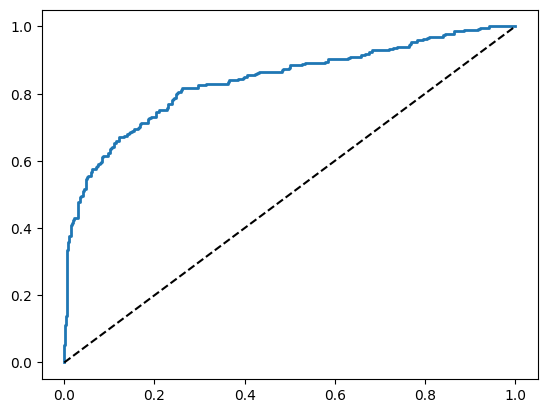

In [1043]:
# ROC de LR

from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(cla_log, X_train, y_train, cv=5, method="decision_function")

from sklearn.metrics import roc_curve 

fpr, tpr, thresholds = roc_curve(y_train, y_scores) 

def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal 
    [...] # Add axis labels and grid Lo  

plot_roc_curve(fpr, tpr) 
plt.show() 


In [1044]:
# Score de la curva ROC de LinearRegression
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.838762269732419

## RandomForestClassifier

In [1045]:
# val cruzada de RFC

cross_val_score(cla_rf, X_train, y_train, cv=5, scoring="accuracy")

array([0.81818182, 0.8041958 , 0.78169014, 0.78169014, 0.80985915])

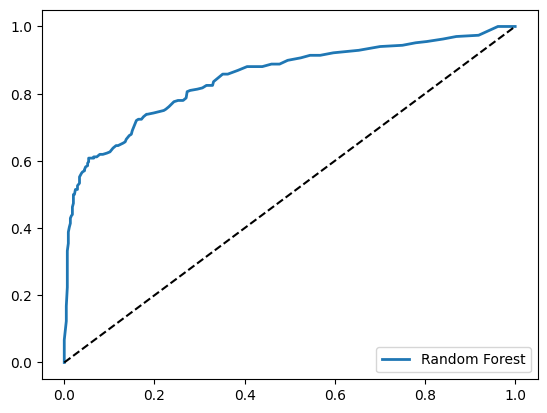

In [1046]:

from sklearn.model_selection import cross_val_predict

y_probas_forest = cross_val_predict(cla_rf, X_train, y_train, cv=3,method="predict_proba") 
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()



In [1047]:
# Score de la curva ROC de Forest
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores_forest)

# El score de Forest es mayor

0.8477754807045852

#### Por qué elegir el que tiene mayor área bajo la curva?

Utilizamos las medidas de ROC para evaluar el desempeño de modelos binarios. El tener un mayor valor o `score` que implica un mayor área por debajo de la curva nos indica que nuestro modelo es mejor a la hora de clasificar. La curva ROC compara la tasa de verdaderos positivos con la tasa de falsos positivos y, mientras mayor sea el área bajo la curva, mejor será la capacidad del modelo para clasificar correctamente.

- Utilizamos entonces `RandomForest` que tiene un mejor puntaje (0.84 > 0.83)

<15>Utilice el metodo grid search sobre el modelo elegido  
en caso de ser LogisticRegression
```
param_grid = [
{'C': [0.1, 1, 10], 'penalty': ['elasticnet'], 'l1_ratio': [0.,0.2,0.4]}
]
```
en caso de ser RandomForest utilize:
```
param_grid = [
{'n_estimators': [30, 100], 'max_features': [2, 4, 6, 8]}
]
```
¿Cuál es el sentido de hacer esto?

In [1048]:

from sklearn.model_selection import GridSearchCV

# Guardamos el valor de la val_cruzada
scores = cross_val_score(cla_rf, X_train, y_train, cv=3, scoring="accuracy")

param_grid = [
    {'n_estimators': [30, 100], 'max_features': [2, 4, 6, 8]}
] 
# lista de parametros

grid_search = GridSearchCV(cla_rf, param_grid, cv=3, scoring="accuracy")
grid_search.fit(X_train, y_train)
grid_search.best_params_


# Realizamos esto para conocer cuales son los mejores hiperparametros 
# para entrenar el modelo RandomForest. 
# En este caso obtenemos las max_features y el numero de estimators.


{'max_features': 4, 'n_estimators': 100}

#### Por que realizamos esto?

Realizamos esto para conocer cuales son los mejores hiperparametros para entrenar el modelo RandomForest. En primer lugar indicamos entre que parametros probar las combinaciones y GridSearch nos indica la mejor combinacion posible.

En este caso obtenemos las max_features y el numero de estimators.

<5%>Imprima el valor de accuracy, recall, precision, f1 y auc_roc, en las regiones de validación

In [1049]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# usar scores de crossval predict
# Y_score > 0.5 as type int 
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

y_pred = cross_val_predict(best_rf, X_train, y_train, cv=3)

accuracy_s = accuracy_score(y_train, y_pred)
recall_s = recall_score(y_train, y_pred)
precision_s = precision_score(y_train, y_pred)
f1_s = f1_score(y_train, y_pred)
roc_auc_score_s = roc_auc_score(y_train, y_pred)

print (accuracy_s)
print (recall_s)
print (precision_s)
print (f1_s)
print (roc_auc_score_s)


0.8047752808988764
0.664179104477612
0.7841409691629956
0.719191919191919
0.7769093720586258


In [1050]:
grid_search.best_estimator_

RandomForestClassifier(max_features=4)

<5%>Imprima el valor de accuracy, recall, precision, f1 y auc_roc, en las regiones de test, 
¿Los números son parecido a lo obtenido en las regiones de validación? ¿A qué puede deberse?

In [1051]:

best_rf = grid_search.best_estimator_
best_rf.fit(X_test, y_test)

y_pred = cross_val_predict(best_rf, X_test, y_test, cv=3)

accuracy_s = accuracy_score(y_test, y_pred)
recall_s = recall_score(y_test, y_pred)
precision_s = precision_score(y_test, y_pred)
f1_s = f1_score(y_test, y_pred)
roc_auc_score_s = roc_auc_score(y_test, y_pred)

print (accuracy_s)
print (recall_s)
print (precision_s)
print (f1_s)
print (roc_auc_score_s)


# Los numeros son parecidos pero no iguales ya que entrenamos nuestro modelo
# con una serie de datos TRAIN y en este caso estamos probando nuestro modelo
# con los datos TEST, que son datos 'nuevos' que el modelo no habia evaluado
# anteriormente.


0.7932960893854749
0.8243243243243243
0.7176470588235294
0.7672955974842768
0.797876447876448


#### A que se deben los `resultados diferentes`:

Los numeros son parecidos pero no iguales ya que entrenamos nuestro modelo con una serie de datos TRAIN y en este caso estamos probando nuestro modelo con los datos TEST, que son datos 'nuevos' y diferentes, que el modelo no habia evaluado anteriormente.